Code used in this notebook serves as examples used in the article; [Data Science and ML (Part 29): Essential Tips for Selecting the Best Forex Data for AI Training Purposes
](https://www.mql5.com/en/articles/15482)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn to set the style
sns.set(style="whitegrid")  # You can choose other styles like "darkgrid", "ticks", etc.

%matplotlib inline

In [32]:
df = pd.read_csv('/kaggle/input/forex-timeseries-ohlc/Timeseries OHLC.csv')
df.head(10)

OPEN     HIGH      LOW    CLOSE  OPEN_LAG1  HIGH_LAG1  LOW_LAG1  \
0  1.18025  1.19050  1.17920  1.18641    1.17617    1.18063   1.17213   
1  1.18627  1.19162  1.18179  1.18768    1.18025    1.19050   1.17920   
2  1.18762  1.18831  1.17553  1.17855    1.18627    1.19162   1.18179   
3  1.17869  1.18007  1.17360  1.17365    1.18762    1.18831   1.17553   
4  1.17365  1.18080  1.17220  1.17394    1.17869    1.18007   1.17360   
5  1.17398  1.18171  1.17111  1.17853    1.17365    1.18080   1.17220   
6  1.17839  1.18642  1.17776  1.18145    1.17398    1.18171   1.17111   
7  1.18125  1.18504  1.17817  1.18414    1.17839    1.18642   1.17776   
8  1.18384  1.18810  1.18281  1.18701    1.18125    1.18504   1.17817   
9  1.18666  1.19657  1.18611  1.19313    1.18384    1.18810   1.18281   

   CLOSE_LAG1  OPEN_LAG2  HIGH_LAG2  ...  DAYOFMONTH  DAYOFWEEK  DAYOFYEAR  \
0     1.18027    1.17708    1.17967  ...         5.0        3.0      217.0   
1     1.18641    1.17617    1.18063  ...         6.0        4.0      218.0   
2     1.18768    1.18025    1.19050  ...         7.0        5.0      219.0   
3     1.17855    1.18627    1.19162  ...        10.0        1.0      222.0   
4     1.17365    1.18762    1.18831  ...        11.0        2.0      223.0   
5     1.17394    1.17869    1.18007  ...        12.0        3.0      224.0   
6     1.17853    1.17365    1.18080  ...        13.0        4.0      225.0   
7     1.18145    1.17398    1.18171  ...        14.0        5.0      226.0   
8     1.18414    1.17839    1.18642  ...        17.0        1.0      229.0   
9     1.18701    1.18125    1.18504  ...        18.0        2.0      230.0   

   MONTH  DIFF_LAG1_OPEN  DIFF_LAG1_HIGH  DIFF_LAG1_LOW  DIFF_LAG1_CLOSE  \
0    8.0         0.00408         0.00987        0.00707          0.00614   
1    8.0         0.00602         0.00112        0.00259          0.00127   
2    8.0         0.00135        -0.00331       -0.00626         -0.00913   
3    8.0        -0.00893        -0.00824       -0.00193         -0.00490   
4    8.0        -0.00504         0.00073       -0.00140          0.00029   
5    8.0         0.00033         0.00091       -0.00109          0.00459   
6    8.0         0.00441         0.00471        0.00665          0.00292   
7    8.0         0.00286        -0.00138        0.00041          0.00269   
8    8.0         0.00259         0.00306        0.00464          0.00287   
9    8.0         0.00282         0.00847        0.00330          0.00612   

   TARGET_CLOSE  TARGET_OPEN  
0       1.18768      1.18627  
1       1.17855      1.18762  
2       1.17365      1.17869  
3       1.17394      1.17365  
4       1.17853      1.17398  
5       1.18145      1.17839  
6       1.18414      1.18125  
7       1.18701      1.18384  
8       1.19313      1.18666  
9       1.18392      1.19310  

[10 rows x 28 columns]

# Filter Methods

### Correlation Matrix

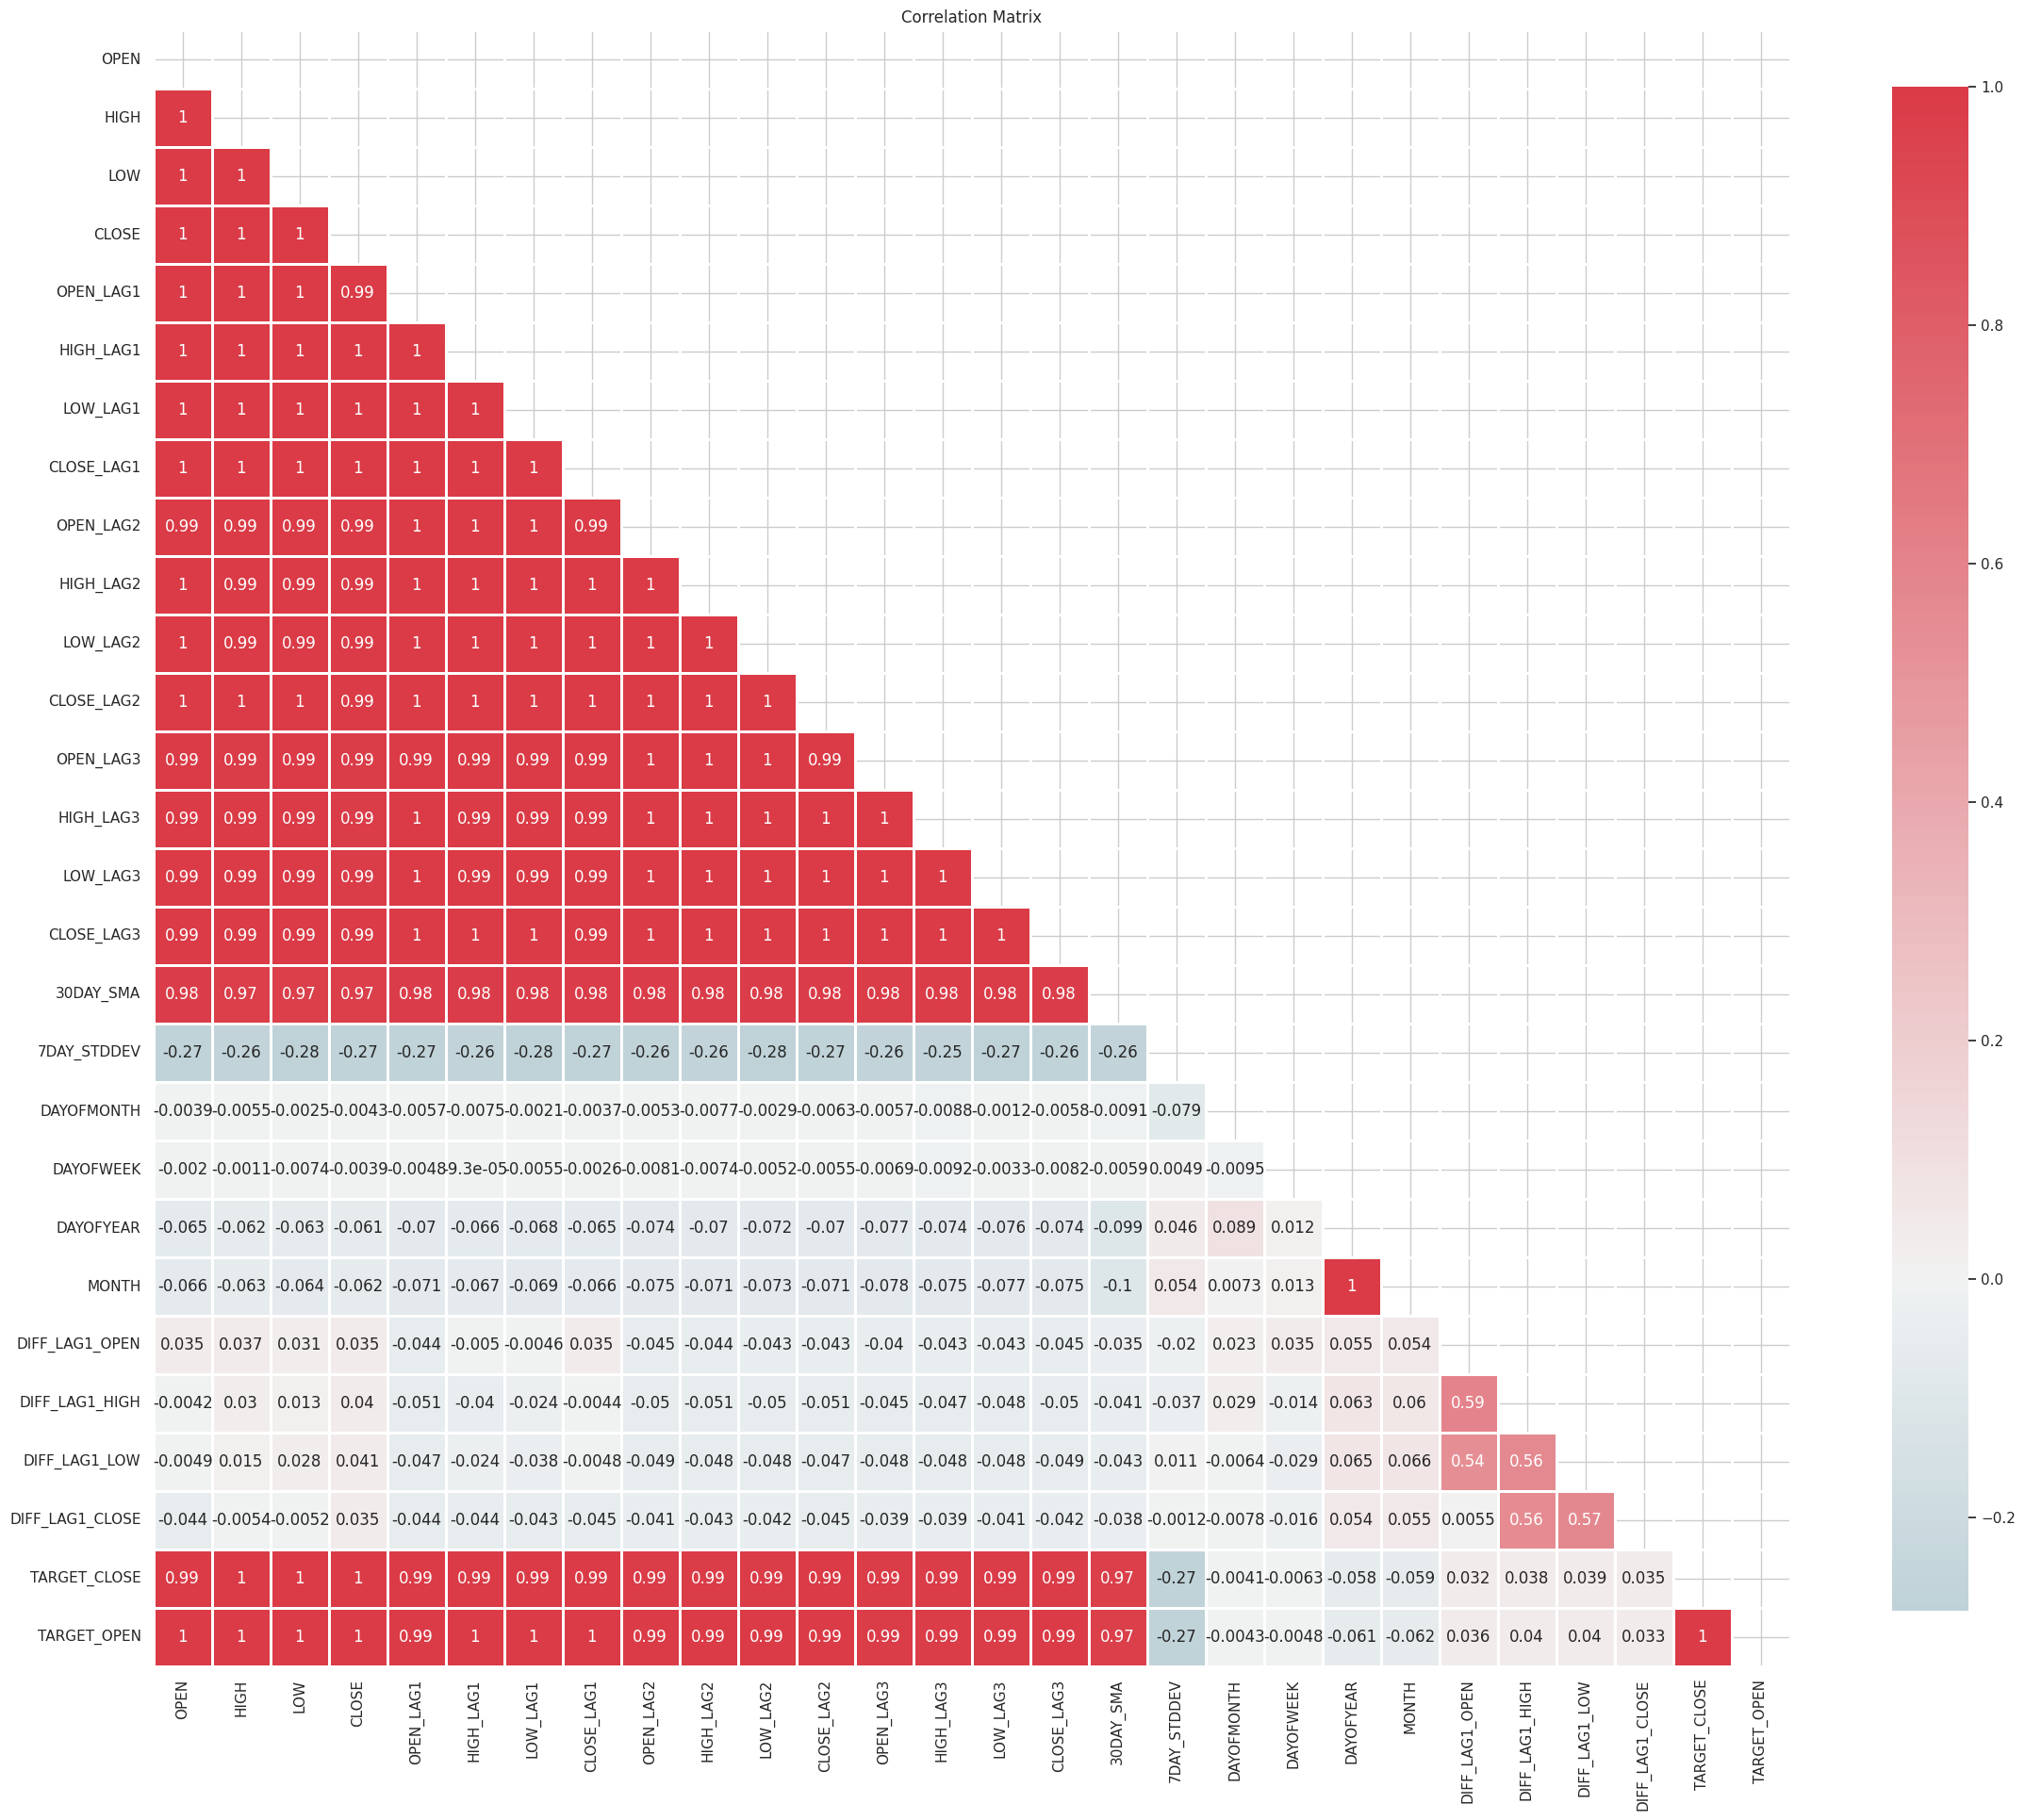

In [33]:
# Compute the correlation matrix
corr_matrix = df.corr()

# We generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Custom colormap


plt.figure(figsize=(28, 28)) # 28 columns to fit better 

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0, annot=True,
            square=True, linewidths=1, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix')
plt.savefig("correlation matrix.png")
plt.show()

### Chi-Squared Test (for categorical features)

In [34]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

target = []

# Loop through each row in the DataFrame to create the target variable

for i in range(len(df)):
    if df.loc[i, 'TARGET_CLOSE'] > df.loc[i, 'TARGET_OPEN']:
        target.append(1)
    else:
        target.append(0)
        

X = pd.DataFrame({
    'DAYOFMONTH': df['DAYOFMONTH'],
    'DAYOFWEEK': df['DAYOFWEEK'],
    'DAYOFYEAR': df['DAYOFYEAR'],
    'MONTH': df['MONTH']
})


chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, target)
chi2_scores = chi2_selector.scores_

# Output scores for each feature

feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores})
print(feature_scores)

      Feature  Chi2 Score
0  DAYOFMONTH    0.622628
1   DAYOFWEEK    0.047481
2   DAYOFYEAR   14.618057
3       MONTH    0.489713


### ANOVA Test

In [35]:
from sklearn.feature_selection import f_classif

# We start by dropping the categorical variables in the dataset

X = df.drop(columns=[
    "DAYOFMONTH",
    "DAYOFWEEK",
    "DAYOFYEAR",
    "MONTH",
    "TARGET_CLOSE",
    "TARGET_OPEN"
])


# Perform ANOVA test

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, target)

# Get the F-scores and p-values
anova_scores = selector.scores_
anova_pvalues = selector.pvalues_

# Create a DataFrame to display results
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': anova_scores, 'p-Value': anova_pvalues})
print(anova_results)

            Feature   F-Score   p-Value
0              OPEN  3.483736  0.062268
1              HIGH  3.627995  0.057103
2               LOW  3.400320  0.065480
3             CLOSE  3.666813  0.055792
4         OPEN_LAG1  3.160177  0.075759
5         HIGH_LAG1  3.363306  0.066962
6          LOW_LAG1  3.309483  0.069181
7        CLOSE_LAG1  3.529789  0.060567
8         OPEN_LAG2  3.015757  0.082767
9         HIGH_LAG2  3.034694  0.081810
10         LOW_LAG2  3.259887  0.071295
11       CLOSE_LAG2  3.206956  0.073629
12        OPEN_LAG3  3.236211  0.072329
13        HIGH_LAG3  3.022234  0.082439
14         LOW_LAG3  3.020219  0.082541
15       CLOSE_LAG3  3.075698  0.079777
16        30DAY_SMA  2.665990  0.102829
17      7DAY_STDDEV  0.639071  0.424238
18   DIFF_LAG1_OPEN  1.237127  0.266293
19   DIFF_LAG1_HIGH  0.991862  0.319529
20    DIFF_LAG1_LOW  0.131002  0.717472
21  DIFF_LAG1_CLOSE  0.198001  0.656435


Select top 2 features based on ANOVA test

In [36]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, target)

# print the selected feature names

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'HIGH_LAG1', 'LOW_LAG1', 'CLOSE_LAG1',
       'LOW_LAG2', 'CLOSE_LAG2', 'OPEN_LAG3'],
      dtype='object')


# Wrapper Methods

### Recursive Feature Elimination (RFE)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Prepare the target variable, again

y = []

# Loop through each row in the DataFrame to create the target variable
for i in range(len(df)):
    if df.loc[i, 'TARGET_CLOSE'] > df.loc[i, 'TARGET_OPEN']:
        y.append(1)
    else:
        y.append(0)

# Drop future variables from the feature set
X = df.drop(columns=["TARGET_CLOSE", "TARGET_OPEN"])

# Initialize the model
model = LogisticRegression(max_iter=10000)

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X, y)
selected_features_mask = rfe.support_

# Getting the names of the selected features
feature_names = X.columns
selected_feature_names = feature_names[selected_features_mask]


selected_features = pd.DataFrame({
    "Name": feature_names,
    "Mask": selected_features_mask
})

selected_features.head(-1)

Name   Mask
0             OPEN   True
1             HIGH   True
2              LOW   True
3            CLOSE   True
4        OPEN_LAG1  False
5        HIGH_LAG1   True
6         LOW_LAG1   True
7       CLOSE_LAG1   True
8        OPEN_LAG2  False
9        HIGH_LAG2  False
10        LOW_LAG2   True
11      CLOSE_LAG2   True
12       OPEN_LAG3   True
13       HIGH_LAG3  False
14        LOW_LAG3  False
15      CLOSE_LAG3  False
16       30DAY_SMA  False
17     7DAY_STDDEV  False
18      DAYOFMONTH  False
19       DAYOFWEEK  False
20       DAYOFYEAR  False
21           MONTH  False
22  DIFF_LAG1_OPEN  False
23  DIFF_LAG1_HIGH  False
24   DIFF_LAG1_LOW  False

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

# Filter the dataset to keep only the selected features

X_selected = X.loc[:, selected_features_mask]

#for better readability, we convert this into pandas dataframe

X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

print("Selected Features")
X_selected_df.head()

Selected Features


OPEN     HIGH      LOW    CLOSE  HIGH_LAG1  LOW_LAG1  CLOSE_LAG1  \
0  1.18025  1.19050  1.17920  1.18641    1.18063   1.17213     1.18027   
1  1.18627  1.19162  1.18179  1.18768    1.19050   1.17920     1.18641   
2  1.18762  1.18831  1.17553  1.17855    1.19162   1.18179     1.18768   
3  1.17869  1.18007  1.17360  1.17365    1.18831   1.17553     1.17855   
4  1.17365  1.18080  1.17220  1.17394    1.18007   1.17360     1.17365   

   LOW_LAG2  CLOSE_LAG2  OPEN_LAG3  
0   1.16959     1.17627    1.18453  
1   1.17213     1.18027    1.17708  
2   1.17920     1.18641    1.17617  
3   1.18179     1.18768    1.18025  
4   1.17553     1.17855    1.18627

### Sequential Feature Selection (SFS)

Forward selection

In [39]:
# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Create a SequentialFeatureSelector object
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')

# Fit the SFS object to the training data
sfs.fit(X, target)

# Get the selected feature indices
selected_features = sfs.get_support(indices=True)
selected_features_names = X.columns[selected_features] # get the feature names

# Print the selected features
print("Selected feature indices:", selected_features)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [ 1  7  8 12 17 19 22 23 24 25]
Selected feature names: Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'HIGH_LAG1', 'LOW_LAG1', 'CLOSE_LAG1',
       'LOW_LAG2', 'CLOSE_LAG2', 'OPEN_LAG3'],
      dtype='object')


Backward selection

In [40]:
# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Create a SequentialFeatureSelector object
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')

# Fit the SFS object to the training data
sfs.fit(X, target)

# Get the selected feature indices
selected_features = sfs.get_support(indices=True)
selected_features_names = X.columns[selected_features] # get the feature names

# Print the selected features
print("Selected feature indices:", selected_features)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [ 2  3  7 10 11 12 13 14 15 16]
Selected feature names: Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'HIGH_LAG1', 'LOW_LAG1', 'CLOSE_LAG1',
       'LOW_LAG2', 'CLOSE_LAG2', 'OPEN_LAG3'],
      dtype='object')


# Embedded Methods
### Lasso Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

y = df["TARGET_CLOSE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A scalling technique
scaler = MinMaxScaler()

# Initialize and fit the lasso model
lasso = Lasso(alpha=0.001)  

# Train the scaler and transfrom data
X_train = scaler.fit_transform(X_train)

lasso.fit(X_train, y_train)

print(f'Coefficients: {lasso.coef_}') #print coefficients

# Predict on the test set
X_test = scaler.transform(X_test)
y_pred = lasso.predict(X_test)

# Calculate mean squared error
mse = r2_score(y_test, y_pred)
print(f'Lasso regression test accuracy = {mse}')


# select all features with coefficents not equal to zero
selected_features = X.columns[lasso.coef_ != 0]
print(f'Selected Features: {selected_features}')

Coefficients: [ 0.          0.02575516  0.05720178  0.1453415   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0228085  -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.        ]
Lasso regression test accuracy = 0.9894539761500866
Selected Features: Index(['HIGH', 'LOW', 'CLOSE', '30DAY_SMA'], dtype='object')


### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

y = []

# Loop through each row in the DataFrame to create the target variable
for i in range(len(df)):
    if df.loc[i, 'TARGET_CLOSE'] > df.loc[i, 'TARGET_OPEN']:
        y.append(1)
    else:
        y.append(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)

importances = model.feature_importances_

print(importances)

selected_features = importances > 0.04
selected_feature_names = X.columns[selected_features]

print("selected features\n",selected_feature_names)

[0.02691807 0.05334113 0.03780997 0.0563491  0.03162462 0.03486413
 0.02652285 0.0237652  0.03398946 0.02822157 0.01794172 0.02818283
 0.04052433 0.02821834 0.0386661  0.03921218 0.04406372 0.06162133
 0.03103843 0.02206782 0.05104613 0.01700301 0.05191551 0.07251801
 0.0502405  0.05233394]
selected features
 Index(['HIGH', 'CLOSE', 'OPEN_LAG3', '30DAY_SMA', '7DAY_STDDEV', 'DAYOFYEAR',
       'DIFF_LAG1_OPEN', 'DIFF_LAG1_HIGH', 'DIFF_LAG1_LOW', 'DIFF_LAG1_CLOSE'],
      dtype='object')


Testing the model

In [73]:
from sklearn.metrics import accuracy_score

test_pred = model.predict(X_test)

print(f"Random forest test accuracy = ",accuracy_score(y_test, test_pred))

Random forest test accuracy =  0.525


# Dimensionality Reduction Techniques

In [84]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pca = PCA(n_components=1)

ohlc = pd.DataFrame({
    "OPEN": df["OPEN"],
    "HIGH": df["HIGH"],
    "LOW": df["LOW"],
    "CLOSE": df["CLOSE"]
})

y = df["TARGET_CLOSE"]

# let us use the linear regression model 
model = LinearRegression()

# for OHLC original data 

model.fit(ohlc, y)
preds = model.predict(ohlc)

print("ohlc_original data LR accuracy = ",r2_score(y, preds))

# For data reduced in dimension

ohlc_reduced = pca.fit_transform(ohlc)

print(ohlc_reduced[:10]) # print 10 rows of the reduced data 

model.fit(ohlc_reduced, y)
preds = model.predict(ohlc_reduced)

print("ohlc_reduced data LR accuracy = ",r2_score(y, preds))

ohlc_original data LR accuracy =  0.9937597843724363
[[-0.14447016]
 [-0.14997874]
 [-0.14129409]
 [-0.1293209 ]
 [-0.12659902]
 [-0.12895961]
 [-0.13831287]
 [-0.14061213]
 [-0.14719862]
 [-0.15752861]]
ohlc_reduced data LR accuracy =  0.9921387699876517


Modifying the original data

In [87]:
new_df = df.drop(columns=["OPEN", "HIGH", "LOW", "CLOSE"]) #
new_df["OHLC"] = ohlc_reduced

# Reorder the columns to make "ohlc" the first column
cols = ["OHLC"] + [col for col in new_df.columns if col != "OHLC"]
new_df = new_df[cols]

new_df.head(10)

OHLC  OPEN_LAG1  HIGH_LAG1  LOW_LAG1  CLOSE_LAG1  OPEN_LAG2  HIGH_LAG2  \
0 -0.144470    1.17617    1.18063   1.17213     1.18027    1.17708    1.17967   
1 -0.149979    1.18025    1.19050   1.17920     1.18641    1.17617    1.18063   
2 -0.141294    1.18627    1.19162   1.18179     1.18768    1.18025    1.19050   
3 -0.129321    1.18762    1.18831   1.17553     1.17855    1.18627    1.19162   
4 -0.126599    1.17869    1.18007   1.17360     1.17365    1.18762    1.18831   
5 -0.128960    1.17365    1.18080   1.17220     1.17394    1.17869    1.18007   
6 -0.138313    1.17398    1.18171   1.17111     1.17853    1.17365    1.18080   
7 -0.140612    1.17839    1.18642   1.17776     1.18145    1.17398    1.18171   
8 -0.147199    1.18125    1.18504   1.17817     1.18414    1.17839    1.18642   
9 -0.157529    1.18384    1.18810   1.18281     1.18701    1.18125    1.18504   

   LOW_LAG2  CLOSE_LAG2  OPEN_LAG3  ...  DAYOFMONTH  DAYOFWEEK  DAYOFYEAR  \
0   1.16959     1.17627    1.18453  ...         5.0        3.0      217.0   
1   1.17213     1.18027    1.17708  ...         6.0        4.0      218.0   
2   1.17920     1.18641    1.17617  ...         7.0        5.0      219.0   
3   1.18179     1.18768    1.18025  ...        10.0        1.0      222.0   
4   1.17553     1.17855    1.18627  ...        11.0        2.0      223.0   
5   1.17360     1.17365    1.18762  ...        12.0        3.0      224.0   
6   1.17220     1.17394    1.17869  ...        13.0        4.0      225.0   
7   1.17111     1.17853    1.17365  ...        14.0        5.0      226.0   
8   1.17776     1.18145    1.17398  ...        17.0        1.0      229.0   
9   1.17817     1.18414    1.17839  ...        18.0        2.0      230.0   

   MONTH  DIFF_LAG1_OPEN  DIFF_LAG1_HIGH  DIFF_LAG1_LOW  DIFF_LAG1_CLOSE  \
0    8.0         0.00408         0.00987        0.00707          0.00614   
1    8.0         0.00602         0.00112        0.00259          0.00127   
2    8.0         0.00135        -0.00331       -0.00626         -0.00913   
3    8.0        -0.00893        -0.00824       -0.00193         -0.00490   
4    8.0        -0.00504         0.00073       -0.00140          0.00029   
5    8.0         0.00033         0.00091       -0.00109          0.00459   
6    8.0         0.00441         0.00471        0.00665          0.00292   
7    8.0         0.00286        -0.00138        0.00041          0.00269   
8    8.0         0.00259         0.00306        0.00464          0.00287   
9    8.0         0.00282         0.00847        0.00330          0.00612   

   TARGET_CLOSE  TARGET_OPEN  
0       1.18768      1.18627  
1       1.17855      1.18762  
2       1.17365      1.17869  
3       1.17394      1.17365  
4       1.17853      1.17398  
5       1.18145      1.17839  
6       1.18414      1.18125  
7       1.18701      1.18384  
8       1.19313      1.18666  
9       1.18392      1.19310  

[10 rows x 25 columns]